# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [53]:
from sklearn.datasets import load_wine
data = load_wine()

X = data.data

y = data.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cl = KMeans(n_clusters = 8)

labels = cl.fit_predict(X)

silhouette_score(X, labels)

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [55]:
cl = KMeans(n_clusters = 5)

labels = cl.fit_predict(X)

silhouette_score(X, labels)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [106]:
cl = KMeans(n_clusters = 3)

labels = cl.fit_predict(X)

silhouette_score(X, labels)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

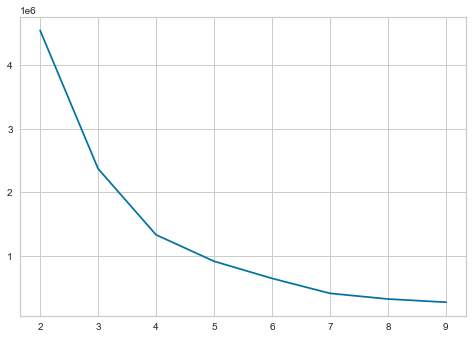

In [73]:
inertias = [KMeans(k).fit(X).inertia_ for k in range(2,10)]
plt.plot(range(2,10), inertias) 

In [57]:
from yellowbrick.cluster import KElbowVisualizer

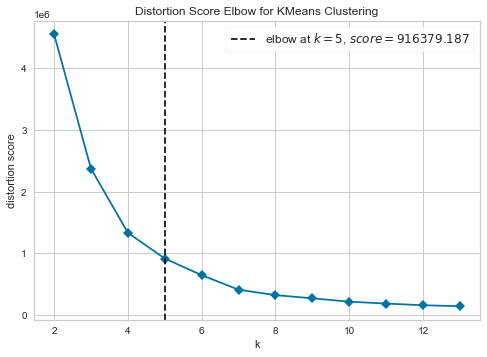

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='distortion',timings=False)

visualizer.fit(X)
visualizer.show()

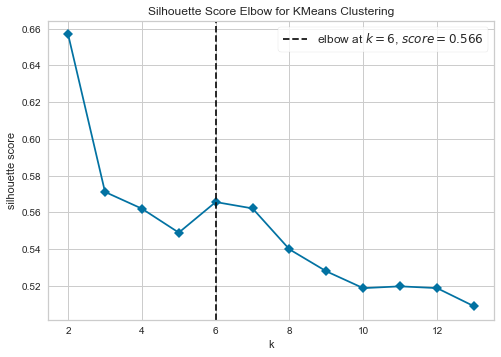

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='silhouette',timings=False)

visualizer.fit(X)
visualizer.show()

In [ ]:
#Mal modelo, la curva hace quiebres.

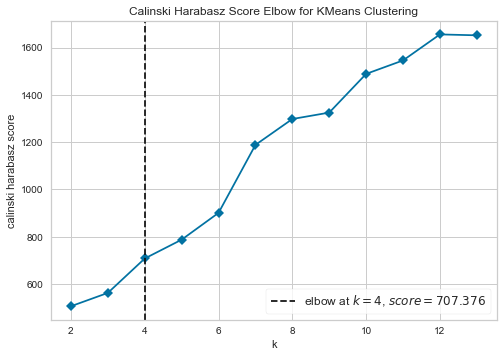

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [60]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), metric='calinski_harabasz',timings=False)

visualizer.fit(X)
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [61]:
from sklearn.cluster import AgglomerativeClustering

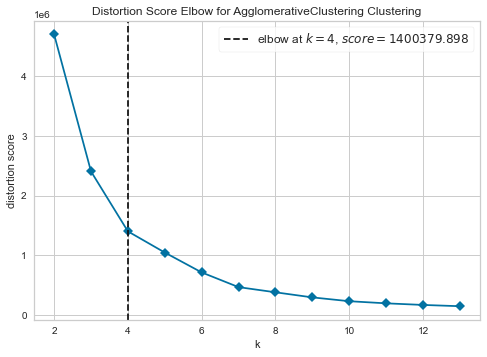

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2,14), metric='distortion',timings=False)

visualizer.fit(X)
visualizer.show()

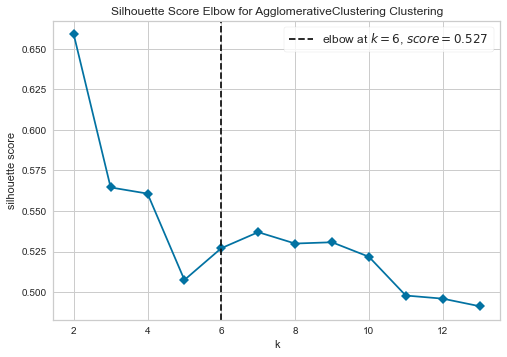

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2,14), metric='silhouette',timings=False)

visualizer.fit(X)
visualizer.show()

In [ ]:
#Mal modelo, la curva hace quiebres.

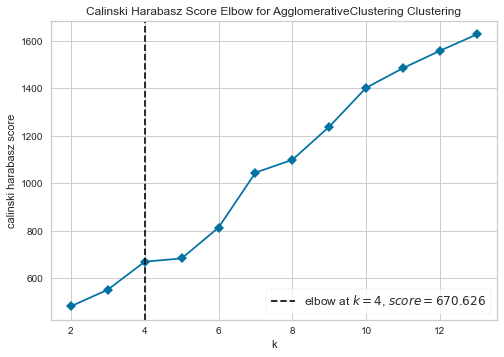

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [64]:
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2,14), metric='calinski_harabasz',timings=False)

visualizer.fit(X)
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [86]:
df = pd.DataFrame(X, columns = data.feature_names)

In [ ]:
#Whis is the best model of all?

# Los primeros son los mejores.

In [100]:
model = KMeans(5)

df['labels'] = model.fit_predict(X)

In [113]:
model = AgglomerativeClustering(3)

df['labels'] = model.fit_predict(X)

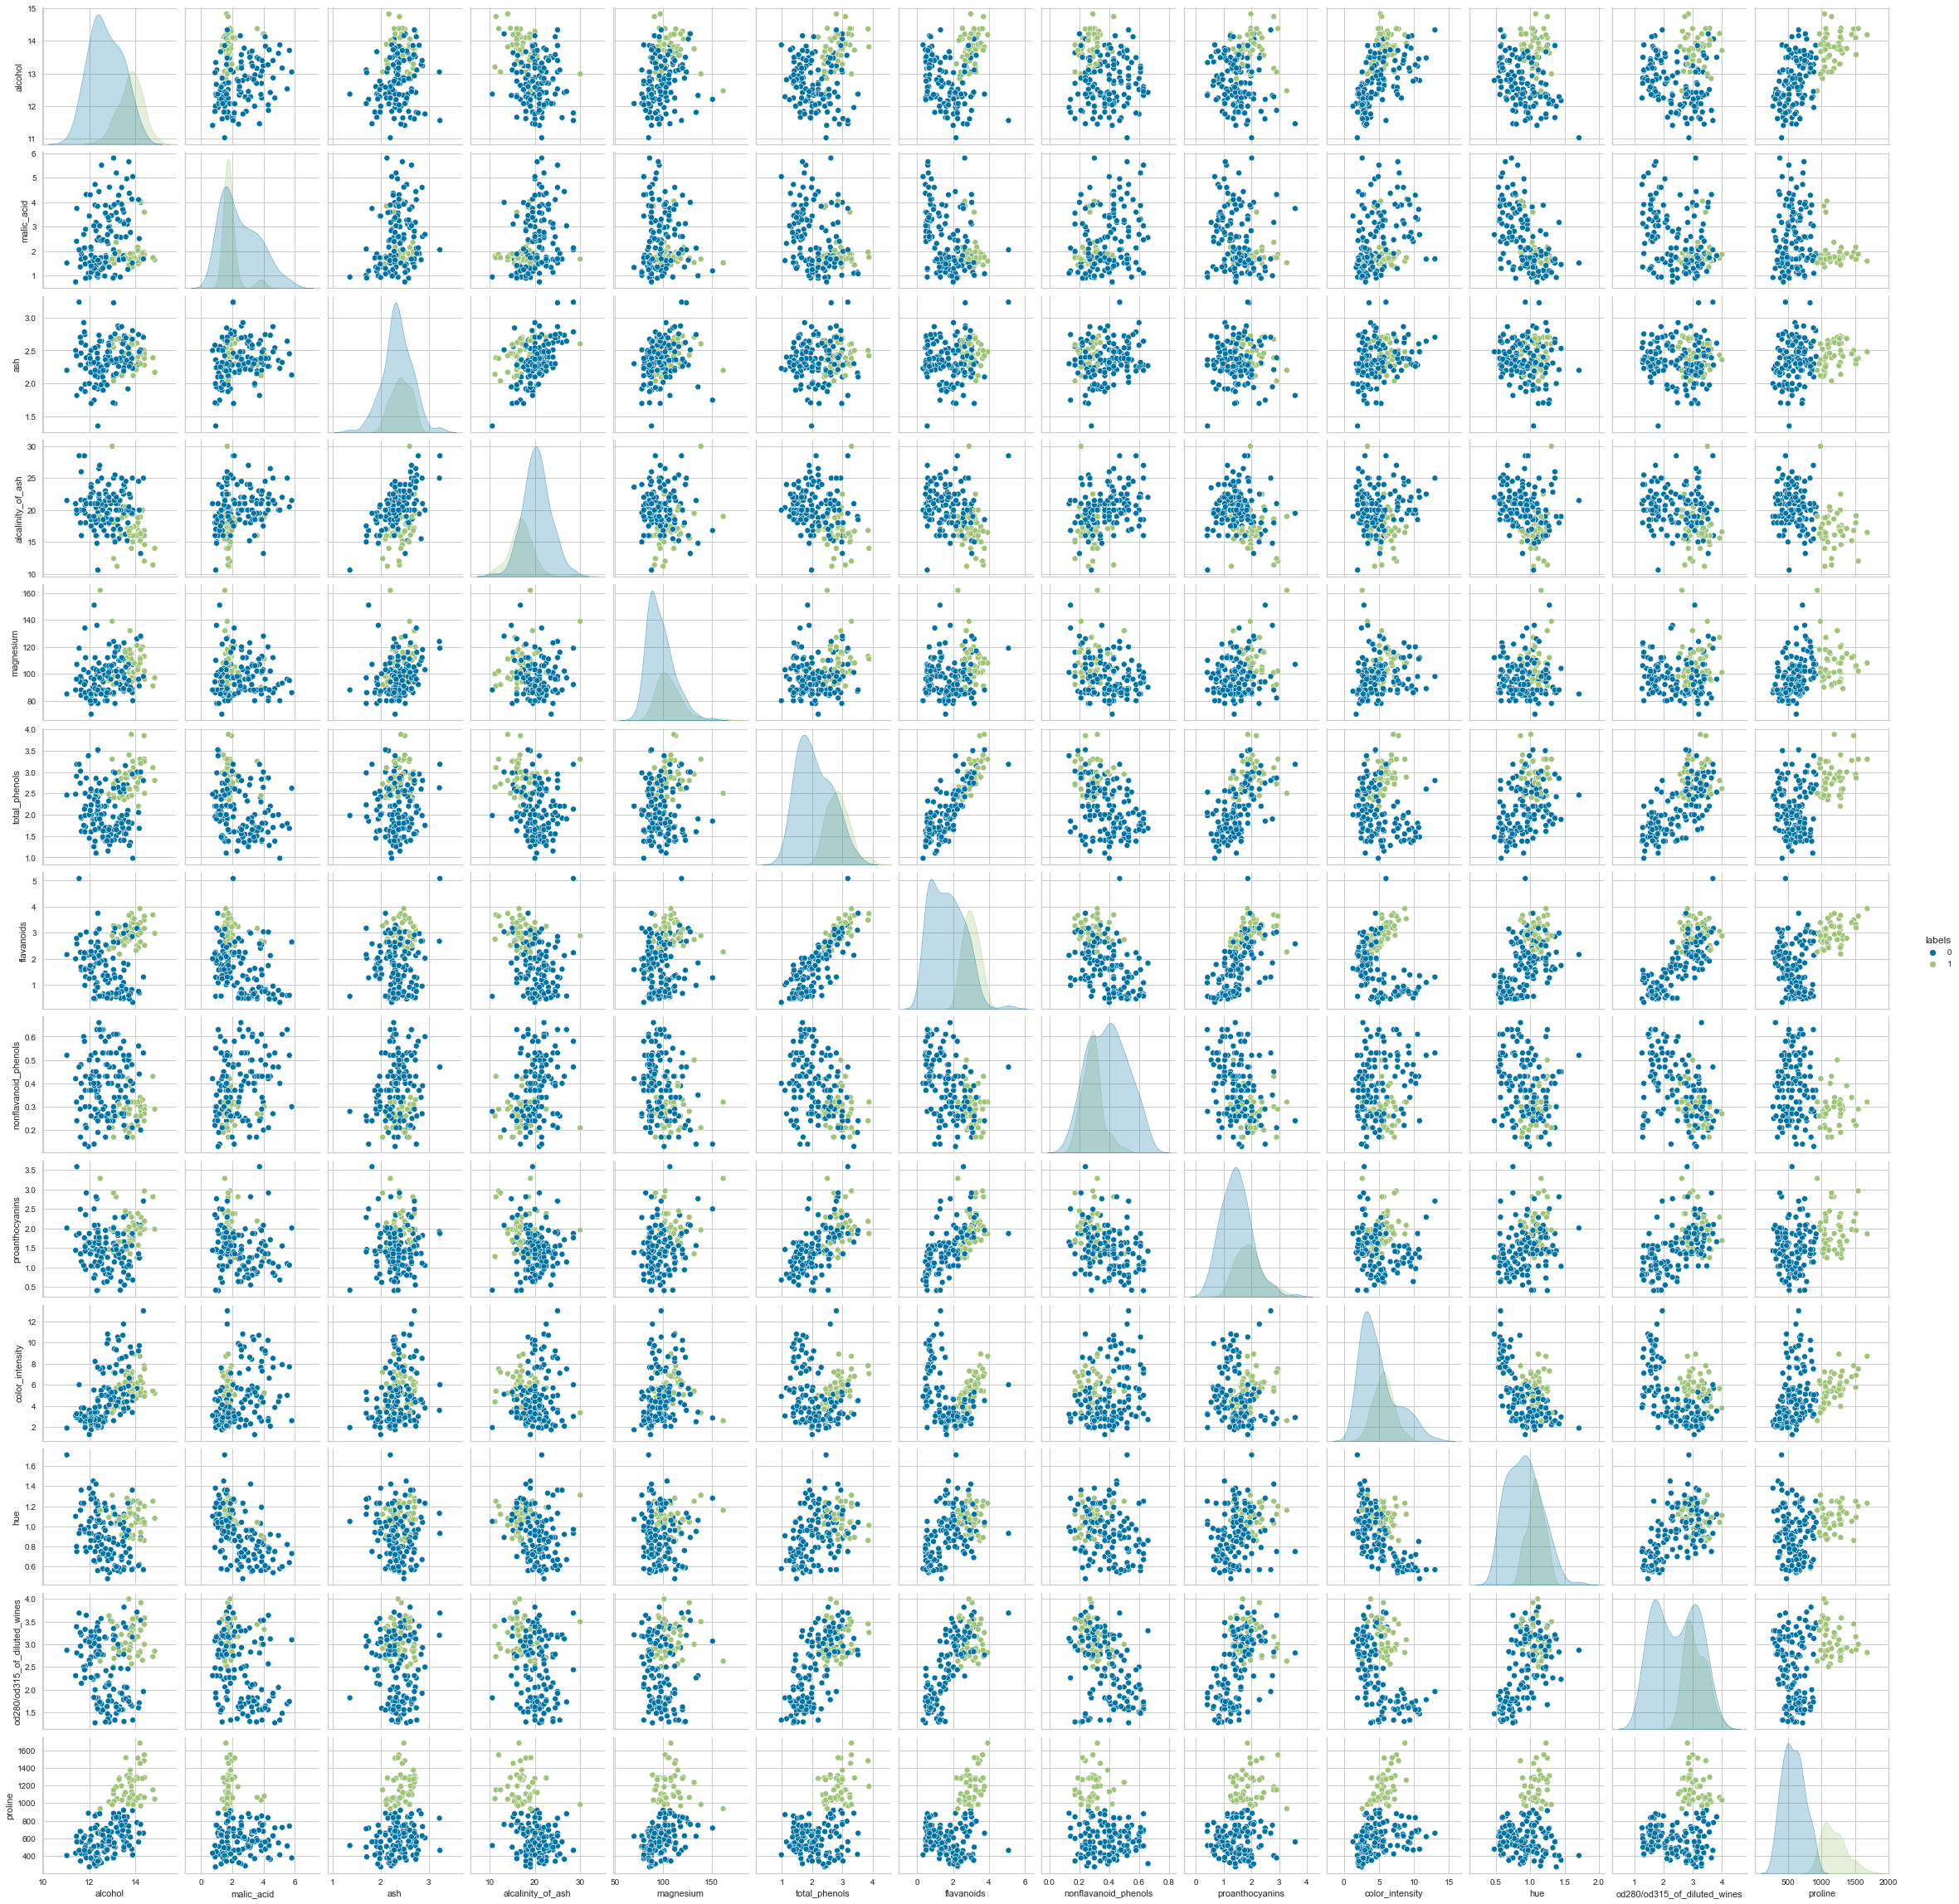

In [90]:
sns.pairplot(data=df, hue='labels')

In [114]:
import seaborn as sns

bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']


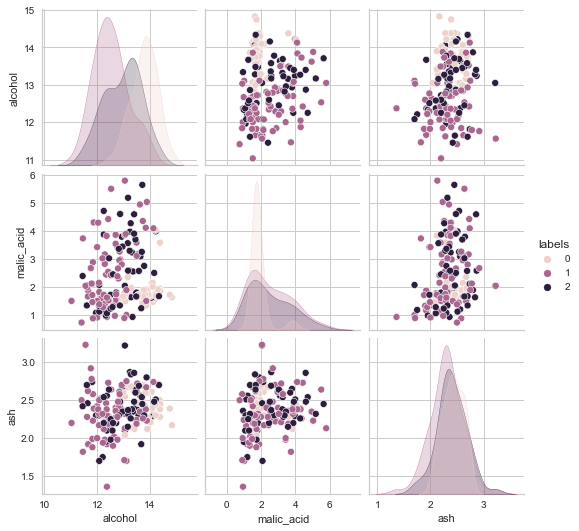

In [115]:
#Primer bin
sns.pairplot(data=df[bin1], hue = 'labels')

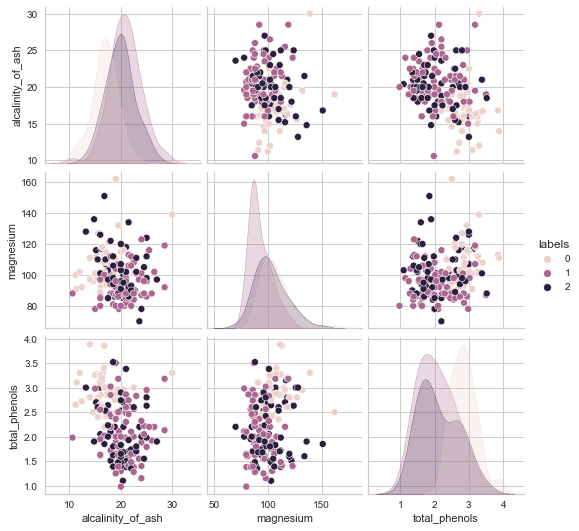

In [116]:
#Segundo bin
sns.pairplot(data=df[bin2], hue = 'labels')

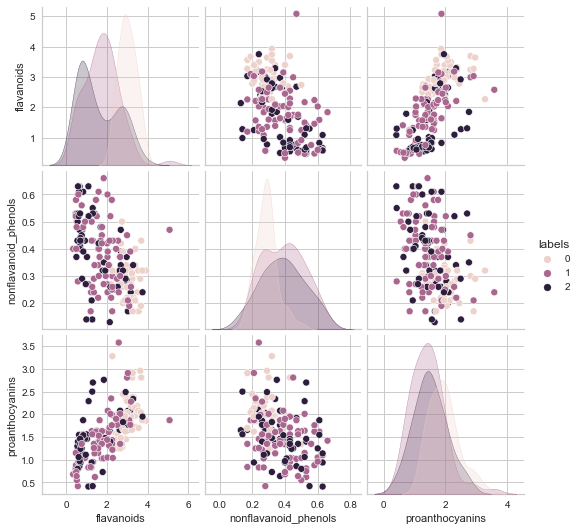

In [117]:
#Tercer bin
sns.pairplot(data=df[bin3], hue = 'labels')

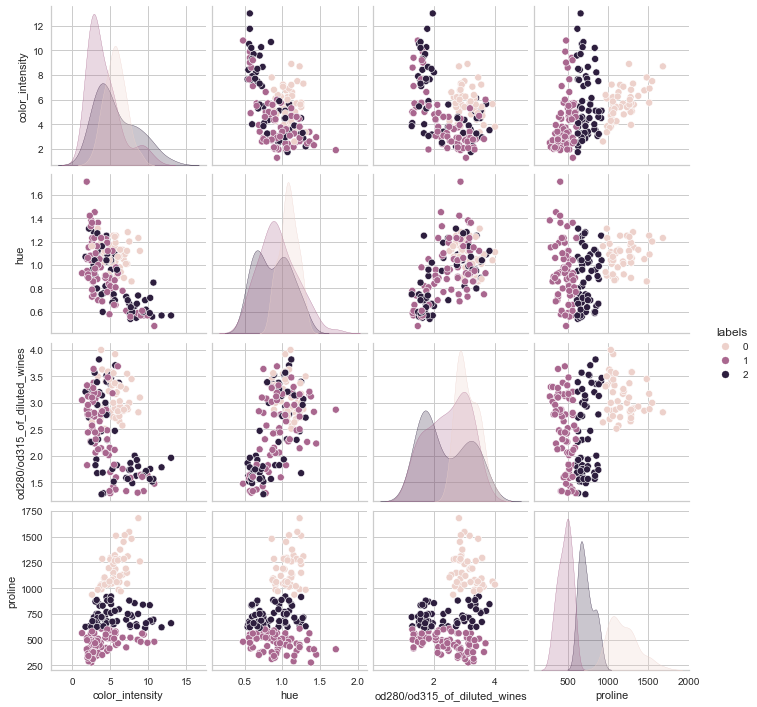

In [118]:
#Cuarto bin
sns.pairplot(data=df[bin4], hue = 'labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

<AxesSubplot:>

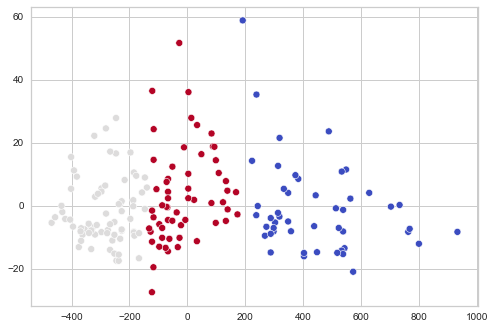

In [124]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pc2 = pca.fit_transform(X)

sns.scatterplot(x=pc2[:,0], y=pc2[:,1], c=df['labels'], cmap='coolwarm')